# NAME - SOHIT PATHAK

# ROLL NUMBER- MA22M019 

1) Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.  (2 marks)

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def J(w1,w2):
    return (w1 - 10)**2 + (w2 - 10)**2

w1 = np.linspace(-500, 500, 1000)
w2 = np.linspace(-500, 500, 1000)
w11, w22 = np.meshgrid(w1, w2)

J1 = J(w11, w22)


<function matplotlib.pyplot.show(close=None, block=None)>

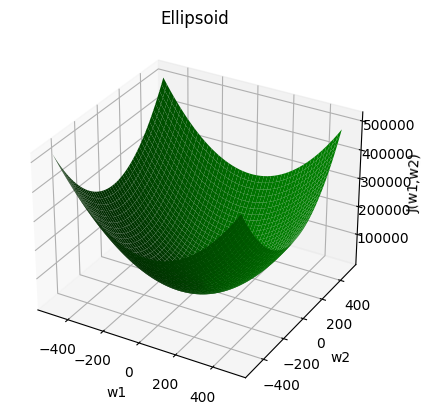

In [3]:
# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w11, w22, J1, color ='g')
ax.set(xlabel='w1',ylabel='w2',title='Ellipsoid',zlabel='J(w1,w2)')

plt.show

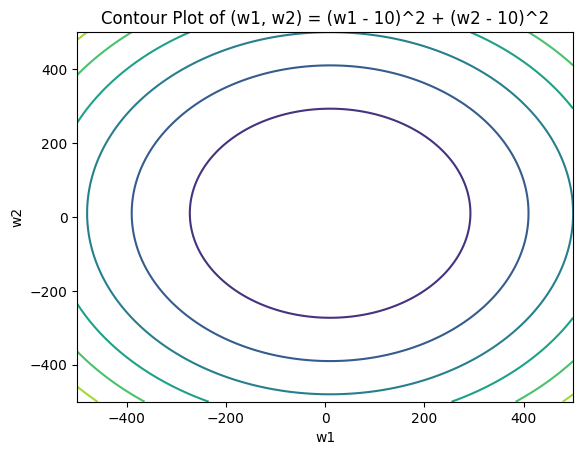

In [50]:
# Plot the contour plot
fig2, ax2 = plt.subplots()
ax2.contour(w11, w22, J1)
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax2.set_title('Contour Plot of (w1, w2) = (w1 - 10)^2 + (w2 - 10)^2')

plt.show()

2) For the function J(w) = w^2 + (54/w), implement the following methods: (a) bracketing method (choose you own a, b, n). (b) Use the bracketed value to get to the critical point employing interval halving method and (c) identify the critical point using Newton-Raphson method and (d) verify the result manually using the optimality criteria (post this write-up as well in .jped/.png etc). (8 marks, 2 each)

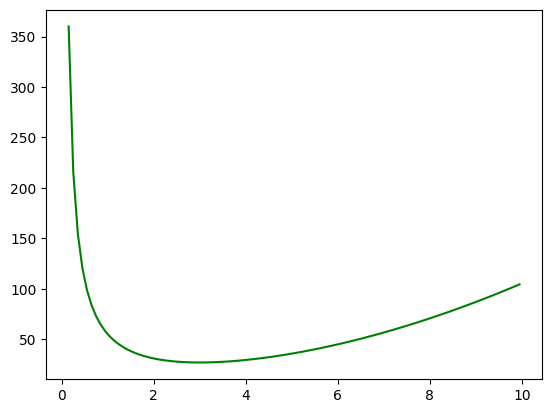

In [70]:
def J(w):
    return w**2 + 54/w
w=np.arange(0.15,10,0.1)
plt.plot(w,J(w),color = 'g')
plt.show()

In [53]:
#(a) Bracketing method
def Bracketing(J,a,b,n):
    delta_w=(b-a)/n
    w1=a
    w2=w1+delta_w
    w3=w2+delta_w
    while J(w1)<=J(w2) or J(w3)<=J(w2):
        w1=w2
        w2=w3
        w3=w2+delta_w
        if w3>b:
            print('there Min not exists inside (a,b).')
            print('Minimum will be at the end points')
            w1=a
            w2=b
            break
    return w1,w2

print(f'We get by bracketing\n\t\t\t a:{Bracketing(J,1,10,50)[0]},b:{Bracketing(J,1,10,50)[1]}')

We get by bracketing
			 a:2.8000000000000003,b:2.9800000000000004


In [57]:
#(b)Interval Halving 
#Now we have from above 
a,b=Bracketing(J,1,10,50)
def Interval_Halving(J,a,b):
    w_m=(a+b)/2  #mid point
    L=b-a   #length of the interval
    epsilon=10**(-4) #tolarence
    w1=a+L/4  
    w2=b-L/4
    while abs(L)>epsilon:
        if J(w1)<J(w_m):
            b=w_m
            w_m=w1
        else:
            if J(w2)<J(w_m):
                a=w_m
                w_m=w2
            else:
                a=w1
                b=w2
        L=b-a
        w1=a+L/4
        w2=b-L/4   
    print('Critical point of function is:',w_m) 

Interval_Halving(J,a,b)

Critical point of function is: 2.9799560546875004


In [58]:
#(c) Newton_rafson Method
def d1_J(w):     #derivative of J
    return 2*w-54/(w**2)
def d2_J(w):    #Second derivative of J
    return 2+108/(w**3)
def Newton_rafson(J,d1_J,d2_J):
    w_k=1 #initial guess
    epsilon=10**-4 #tolerance
    i=0
    while abs(d1_J(w_k))>epsilon:
        w_k=w_k-d1_J(w_k)/d2_J(w_k)
        i+=1
    print('Critical point of function will be:',w_k,'\nNumber of iterations:',i)
Newton_rafson(J,d1_J,d2_J)

Critical point of function will be: 2.999999931328473 
Number of iterations: 6


3) Use the code developed for Question 2 to find the critical point of the function f(w) = sin (w) in the interval (0,pi)  and verify the result manually using the optimality criteria (post this write-up  in .jped/.png etc). Plot the optimal points found by both methods. (5 marks , 3 +2)

In [63]:
def f(w):
    return np.sin(w)
def d1_f(w):
    return np.cos(w)
def d2_f(w):
    return -np.sin(w)

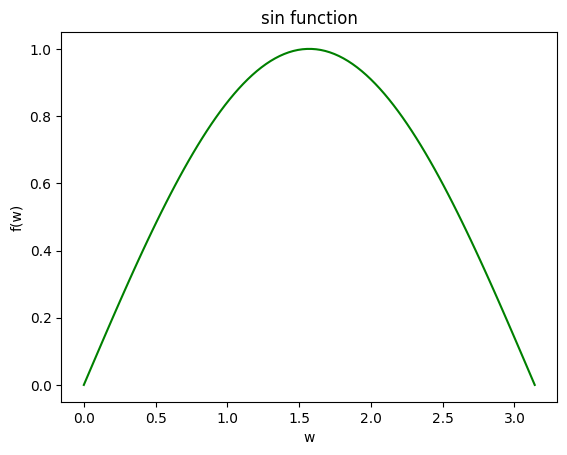

In [69]:
x=np.linspace(0,np.pi,100)
plt.plot(x,f(x),color='g')
plt.xlabel('w')
plt.ylabel('f(w)')
plt.title('sin function')
plt.show()

In [66]:
Bracketing(f,0,np.pi,100)

there Min not exists inside (a,b).
Minimum will be at the end points


(0, 3.141592653589793)

In [68]:
Newton_rafson(f,d1_f,d2_f)

Critical point of function will be: 1.5707963267954879 
Number of iterations: 3
